In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
data = pd.read_csv('data/titanic_withEncoded.csv')

In [57]:
X = data.drop(columns=['Unnamed: 0', 'PassengerId', 'Survived'])
y = data['Survived']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [59]:
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression(random_state=1, C=10).fit(X_train_std, y_train)

In [62]:
final_score = clf.score(X_test_std, y_test)
print('Score: {}'.format(final_score))

Score: 0.796


In [64]:
# new_age_score = clf.score(
#     X_test_std[X_test['NewAge']!=-1],
#     y_test[X_test['NewAge']!=-1]
# )
# print('Score (NewAge==-1): {}'.format(new_age_score))

In [65]:
prob = clf.predict_proba(X_test_std)

(array([ 8., 13.,  9., 10.,  4.,  6.,  7.,  6.,  5.,  2.,  2.,  3.,  1.,
         2.,  3.,  5.,  1.,  1.,  1.,  2.,  5.,  6.,  1.,  0.]),
 array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
        0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
        0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
        0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
        0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ]),
 <BarContainer object of 24 artists>)

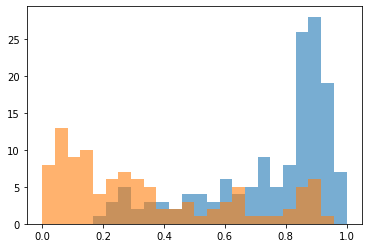

In [66]:
plt.hist([p for p, y in zip(prob[:,0], y_test) if y == 0], bins=np.linspace(0, 1, 25), alpha=0.6)
plt.hist([p for p, y in zip(prob[:,0], y_test) if y == 1], bins=np.linspace(0, 1, 25), alpha=0.6)

### Learning curve

In [67]:
from sklearn.model_selection import learning_curve

In [68]:
train_sizes, train_scores, test_scores = learning_curve(
    clf,
    X_train_std,
    y_train,
    train_sizes=np.linspace(0.1, 1, 10),
    cv=5
)

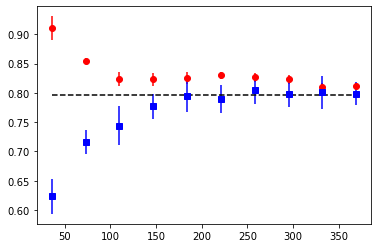

In [69]:
train_score_mean = np.mean(train_scores, axis=1)
train_score_error = np.std(train_scores, axis=1) / np.sqrt(len(train_scores[0]))

test_score_mean = np.mean(test_scores, axis=1)
test_score_error = np.std(test_scores, axis=1) / np.sqrt(len(test_scores[0]))

plt.errorbar(train_sizes, train_score_mean, yerr=train_score_error, color='r', linestyle='none', marker='o')
plt.errorbar(train_sizes, test_score_mean, yerr=test_score_error, color='b', linestyle='none', marker='s')

plt.plot((train_sizes[0], train_sizes[-1]), (final_score, final_score), linestyle='--', color='k')

### Validation curve

In [70]:
clf.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [71]:
from sklearn.model_selection import validation_curve

In [72]:
param_range = np.logspace(-3, 5, 20)
train_scores, test_scores = validation_curve(
    estimator=clf, 
    X=X_train_std, 
    y=y_train, 
    param_name='C', 
    param_range=param_range,
    cv=5
)

In [73]:
mean_train = np.mean(train_scores, axis=1)
std_train = np.std(train_scores, axis=1)  / np.sqrt(len(train_scores[0]))

mean_test = np.mean(test_scores, axis=1)
std_test = np.std(test_scores, axis=1) / np.sqrt(len(test_scores[0]))

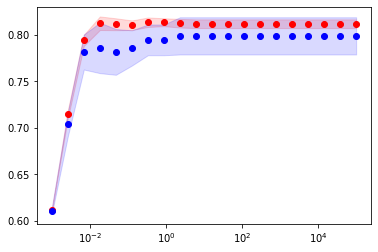

In [74]:
ax = plt.gca()
ax.set_xscale('log')

plt.plot(param_range, mean_train, color='r', linestyle='none', marker='o')
plt.fill_between(param_range, mean_train + std_train, mean_train - std_train, alpha=0.15, color='r')

plt.plot(param_range, mean_test, color='b', linestyle='none', marker='o')
plt.fill_between(param_range, mean_test + std_test, mean_test - std_test, alpha=0.15, color='b')


It seems like C=10 is good

In [75]:
clf = LogisticRegression(random_state=1, C=10).fit(X_train_std, y_train)

In [76]:
final_score = clf.score(X_test_std, y_test)
print('Score: {}'.format(final_score))

Score: 0.796


In [77]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test_std)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_mat)

[[124  23]
 [ 28  75]]


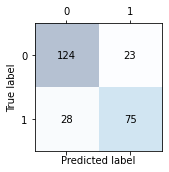

In [78]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()